In [45]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('song_data.csv')
df

song_name  song_popularity  song_duration_ms  \
0      Boulevard of Broken Dreams               73            262333   
1                      In The End               66            216933   
2               Seven Nation Army               76            231733   
3                      By The Way               74            216933   
4               How You Remind Me               56            223826   
...                           ...              ...               ...   
18830              Let It Breathe               60            159645   
18831                     Answers               60            205666   
18832      Sudden Love (Acoustic)               23            182211   
18833           Gentle on My Mind               55            352280   
18834                    Up to Me               60            193533   

       acousticness  danceability  energy  instrumentalness  key  liveness  \
0          0.005520         0.496   0.682          0.000029    8    0.0589   
1          0.010300         0.542   0.853          0.000000    3    0.1080   
2          0.008170         0.737   0.463          0.447000    0    0.2550   
3          0.026400         0.451   0.970          0.003550    0    0.1020   
4          0.000954         0.447   0.766          0.000000   10    0.1130   
...             ...           ...     ...               ...  ...       ...   
18830      0.893000         0.500   0.151          0.000065   11    0.1110   
18831      0.765000         0.495   0.161          0.000001   11    0.1050   
18832      0.847000         0.719   0.325          0.000000    0    0.1250   
18833      0.945000         0.488   0.326          0.015700    3    0.1190   
18834      0.911000         0.640   0.381          0.000254    4    0.1040   

       loudness  audio_mode  speechiness    tempo  time_signature  \
0        -4.095           1       0.0294  167.060               4   
1        -6.407           0       0.0498  105.256               4   
2        -7.828           1       0.0792  123.881               4   
3        -4.938           1       0.1070  122.444               4   
4        -5.065           1       0.0313  172.011               4   
...         ...         ...          ...      ...             ...   
18830   -16.107           1       0.0348  113.969               4   
18831   -14.078           0       0.0301   94.286               4   
18832   -12.222           1       0.0355  130.534               4   
18833   -12.020           1       0.0328  106.063               4   
18834   -11.790           1       0.0302   91.490               4   

       audio_valence  
0              0.474  
1              0.370  
2              0.324  
3              0.198  
4              0.574  
...              ...  
18830          0.300  
18831          0.265  
18832          0.286  
18833          0.323  
18834          0.581  

[18835 rows x 15 columns]

### Data Exploration

In [9]:
#check unique values of a categorical feature
df['song_name'].nunique()

13070

In [10]:
#check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [15]:
df.isnull().mean()

song_name           0.0
song_popularity     0.0
song_duration_ms    0.0
acousticness        0.0
danceability        0.0
energy              0.0
instrumentalness    0.0
key                 0.0
liveness            0.0
loudness            0.0
audio_mode          0.0
speechiness         0.0
tempo               0.0
time_signature      0.0
audio_valence       0.0
dtype: float64

In [16]:
#remove the song name as based on song name you won't be able to judge the correct popularity number 
# and also it has many categorical value and your model undertands numbers.

# 2 ways to drop a column
# - using .drop()
# - or selecting other columns leaving first column
df.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

In [97]:
df.describe()

song_popularity  song_duration_ms  acousticness  danceability  \
count     18835.000000      1.883500e+04  18835.000000  18835.000000   
mean         52.991877      2.182116e+05      0.258539      0.633348   
std          21.905654      5.988754e+04      0.288719      0.156723   
min           0.000000      1.200000e+04      0.000001      0.000000   
25%          40.000000      1.843395e+05      0.024100      0.533000   
50%          56.000000      2.113060e+05      0.132000      0.645000   
75%          69.000000      2.428440e+05      0.424000      0.748000   
max         100.000000      1.799346e+06      0.996000      0.987000   

             energy  instrumentalness           key      liveness  \
count  18835.000000      18835.000000  18835.000000  18835.000000   
mean       0.644995          0.078008      5.289196      0.179650   
std        0.214101          0.221591      3.614595      0.143984   
min        0.001070          0.000000      0.000000      0.010900   
25%        0.510000          0.000000      2.000000      0.092900   
50%        0.674000          0.000011      5.000000      0.122000   
75%        0.815000          0.002570      8.000000      0.221000   
max        0.999000          0.997000     11.000000      0.986000   

           loudness    audio_mode   speechiness         tempo  time_signature  \
count  18835.000000  18835.000000  18835.000000  18835.000000    18835.000000   
mean      -7.447435      0.628139      0.102099    121.073154        3.959119   
std        3.827831      0.483314      0.104378     28.714456        0.298533   
min      -38.768000      0.000000      0.000000      0.000000        0.000000   
25%       -9.044000      0.000000      0.037800     98.368000        4.000000   
50%       -6.555000      1.000000      0.055500    120.013000        4.000000   
75%       -4.908000      1.000000      0.119000    139.931000        4.000000   
max        1.585000      1.000000      0.941000    242.318000        5.000000   

       audio_valence  
count   18835.000000  
mean        0.527967  
std         0.244632  
min         0.000000  
25%         0.335000  
50%         0.527000  
75%         0.725000  
max         0.984000

In [18]:
# new_data = df[['song_popularity', 'song_duration_ms', 'acousticness',
#        'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
#        'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
#        'audio_valence']]

# new_data = df.drop(['song_name'],axis=1)
new_data

song_popularity  song_duration_ms  acousticness  danceability  energy  \
0                   73            262333      0.005520         0.496   0.682   
1                   66            216933      0.010300         0.542   0.853   
2                   76            231733      0.008170         0.737   0.463   
3                   74            216933      0.026400         0.451   0.970   
4                   56            223826      0.000954         0.447   0.766   
...                ...               ...           ...           ...     ...   
18830               60            159645      0.893000         0.500   0.151   
18831               60            205666      0.765000         0.495   0.161   
18832               23            182211      0.847000         0.719   0.325   
18833               55            352280      0.945000         0.488   0.326   
18834               60            193533      0.911000         0.640   0.381   

       instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
0              0.000029    8    0.0589    -4.095           1       0.0294   
1              0.000000    3    0.1080    -6.407           0       0.0498   
2              0.447000    0    0.2550    -7.828           1       0.0792   
3              0.003550    0    0.1020    -4.938           1       0.1070   
4              0.000000   10    0.1130    -5.065           1       0.0313   
...                 ...  ...       ...       ...         ...          ...   
18830          0.000065   11    0.1110   -16.107           1       0.0348   
18831          0.000001   11    0.1050   -14.078           0       0.0301   
18832          0.000000    0    0.1250   -12.222           1       0.0355   
18833          0.015700    3    0.1190   -12.020           1       0.0328   
18834          0.000254    4    0.1040   -11.790           1       0.0302   

         tempo  time_signature  audio_valence  
0      167.060               4          0.474  
1      105.256               4          0.370  
2      123.881               4          0.324  
3      122.444               4          0.198  
4      172.011               4          0.574  
...        ...             ...            ...  
18830  113.969               4          0.300  
18831   94.286               4          0.265  
18832  130.534               4          0.286  
18833  106.063               4          0.323  
18834   91.490               4          0.581  

[18835 rows x 14 columns]

In [29]:
X = new_data.iloc[:,1:]
Y = new_data.iloc[:,0]

In [30]:
Y

0        73
1        66
2        76
3        74
4        56
         ..
18830    60
18831    60
18832    23
18833    55
18834    60
Name: song_popularity, Length: 18835, dtype: int64

In [31]:
X

song_duration_ms  acousticness  danceability  energy  instrumentalness  \
0                262333      0.005520         0.496   0.682          0.000029   
1                216933      0.010300         0.542   0.853          0.000000   
2                231733      0.008170         0.737   0.463          0.447000   
3                216933      0.026400         0.451   0.970          0.003550   
4                223826      0.000954         0.447   0.766          0.000000   
...                 ...           ...           ...     ...               ...   
18830            159645      0.893000         0.500   0.151          0.000065   
18831            205666      0.765000         0.495   0.161          0.000001   
18832            182211      0.847000         0.719   0.325          0.000000   
18833            352280      0.945000         0.488   0.326          0.015700   
18834            193533      0.911000         0.640   0.381          0.000254   

       key  liveness  loudness  audio_mode  speechiness    tempo  \
0        8    0.0589    -4.095           1       0.0294  167.060   
1        3    0.1080    -6.407           0       0.0498  105.256   
2        0    0.2550    -7.828           1       0.0792  123.881   
3        0    0.1020    -4.938           1       0.1070  122.444   
4       10    0.1130    -5.065           1       0.0313  172.011   
...    ...       ...       ...         ...          ...      ...   
18830   11    0.1110   -16.107           1       0.0348  113.969   
18831   11    0.1050   -14.078           0       0.0301   94.286   
18832    0    0.1250   -12.222           1       0.0355  130.534   
18833    3    0.1190   -12.020           1       0.0328  106.063   
18834    4    0.1040   -11.790           1       0.0302   91.490   

       time_signature  audio_valence  
0                   4          0.474  
1                   4          0.370  
2                   4          0.324  
3                   4          0.198  
4                   4          0.574  
...               ...            ...  
18830               4          0.300  
18831               4          0.265  
18832               4          0.286  
18833               4          0.323  
18834               4          0.581  

[18835 rows x 13 columns]

### EDA

In [20]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 1.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 3.8 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 3.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 2.9 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 4.1 MB/s eta 0:00:00a 0:00:01


In [21]:
import seaborn as sns

/Users/roshnitayal/anaconda3/envs/songproject/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


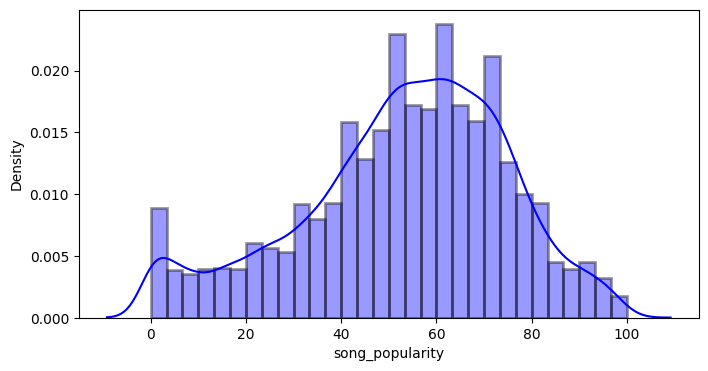

In [90]:
plt.figure(figsize=[8,4])
sns.distplot(new_data['song_popularity'], color='b',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.show()

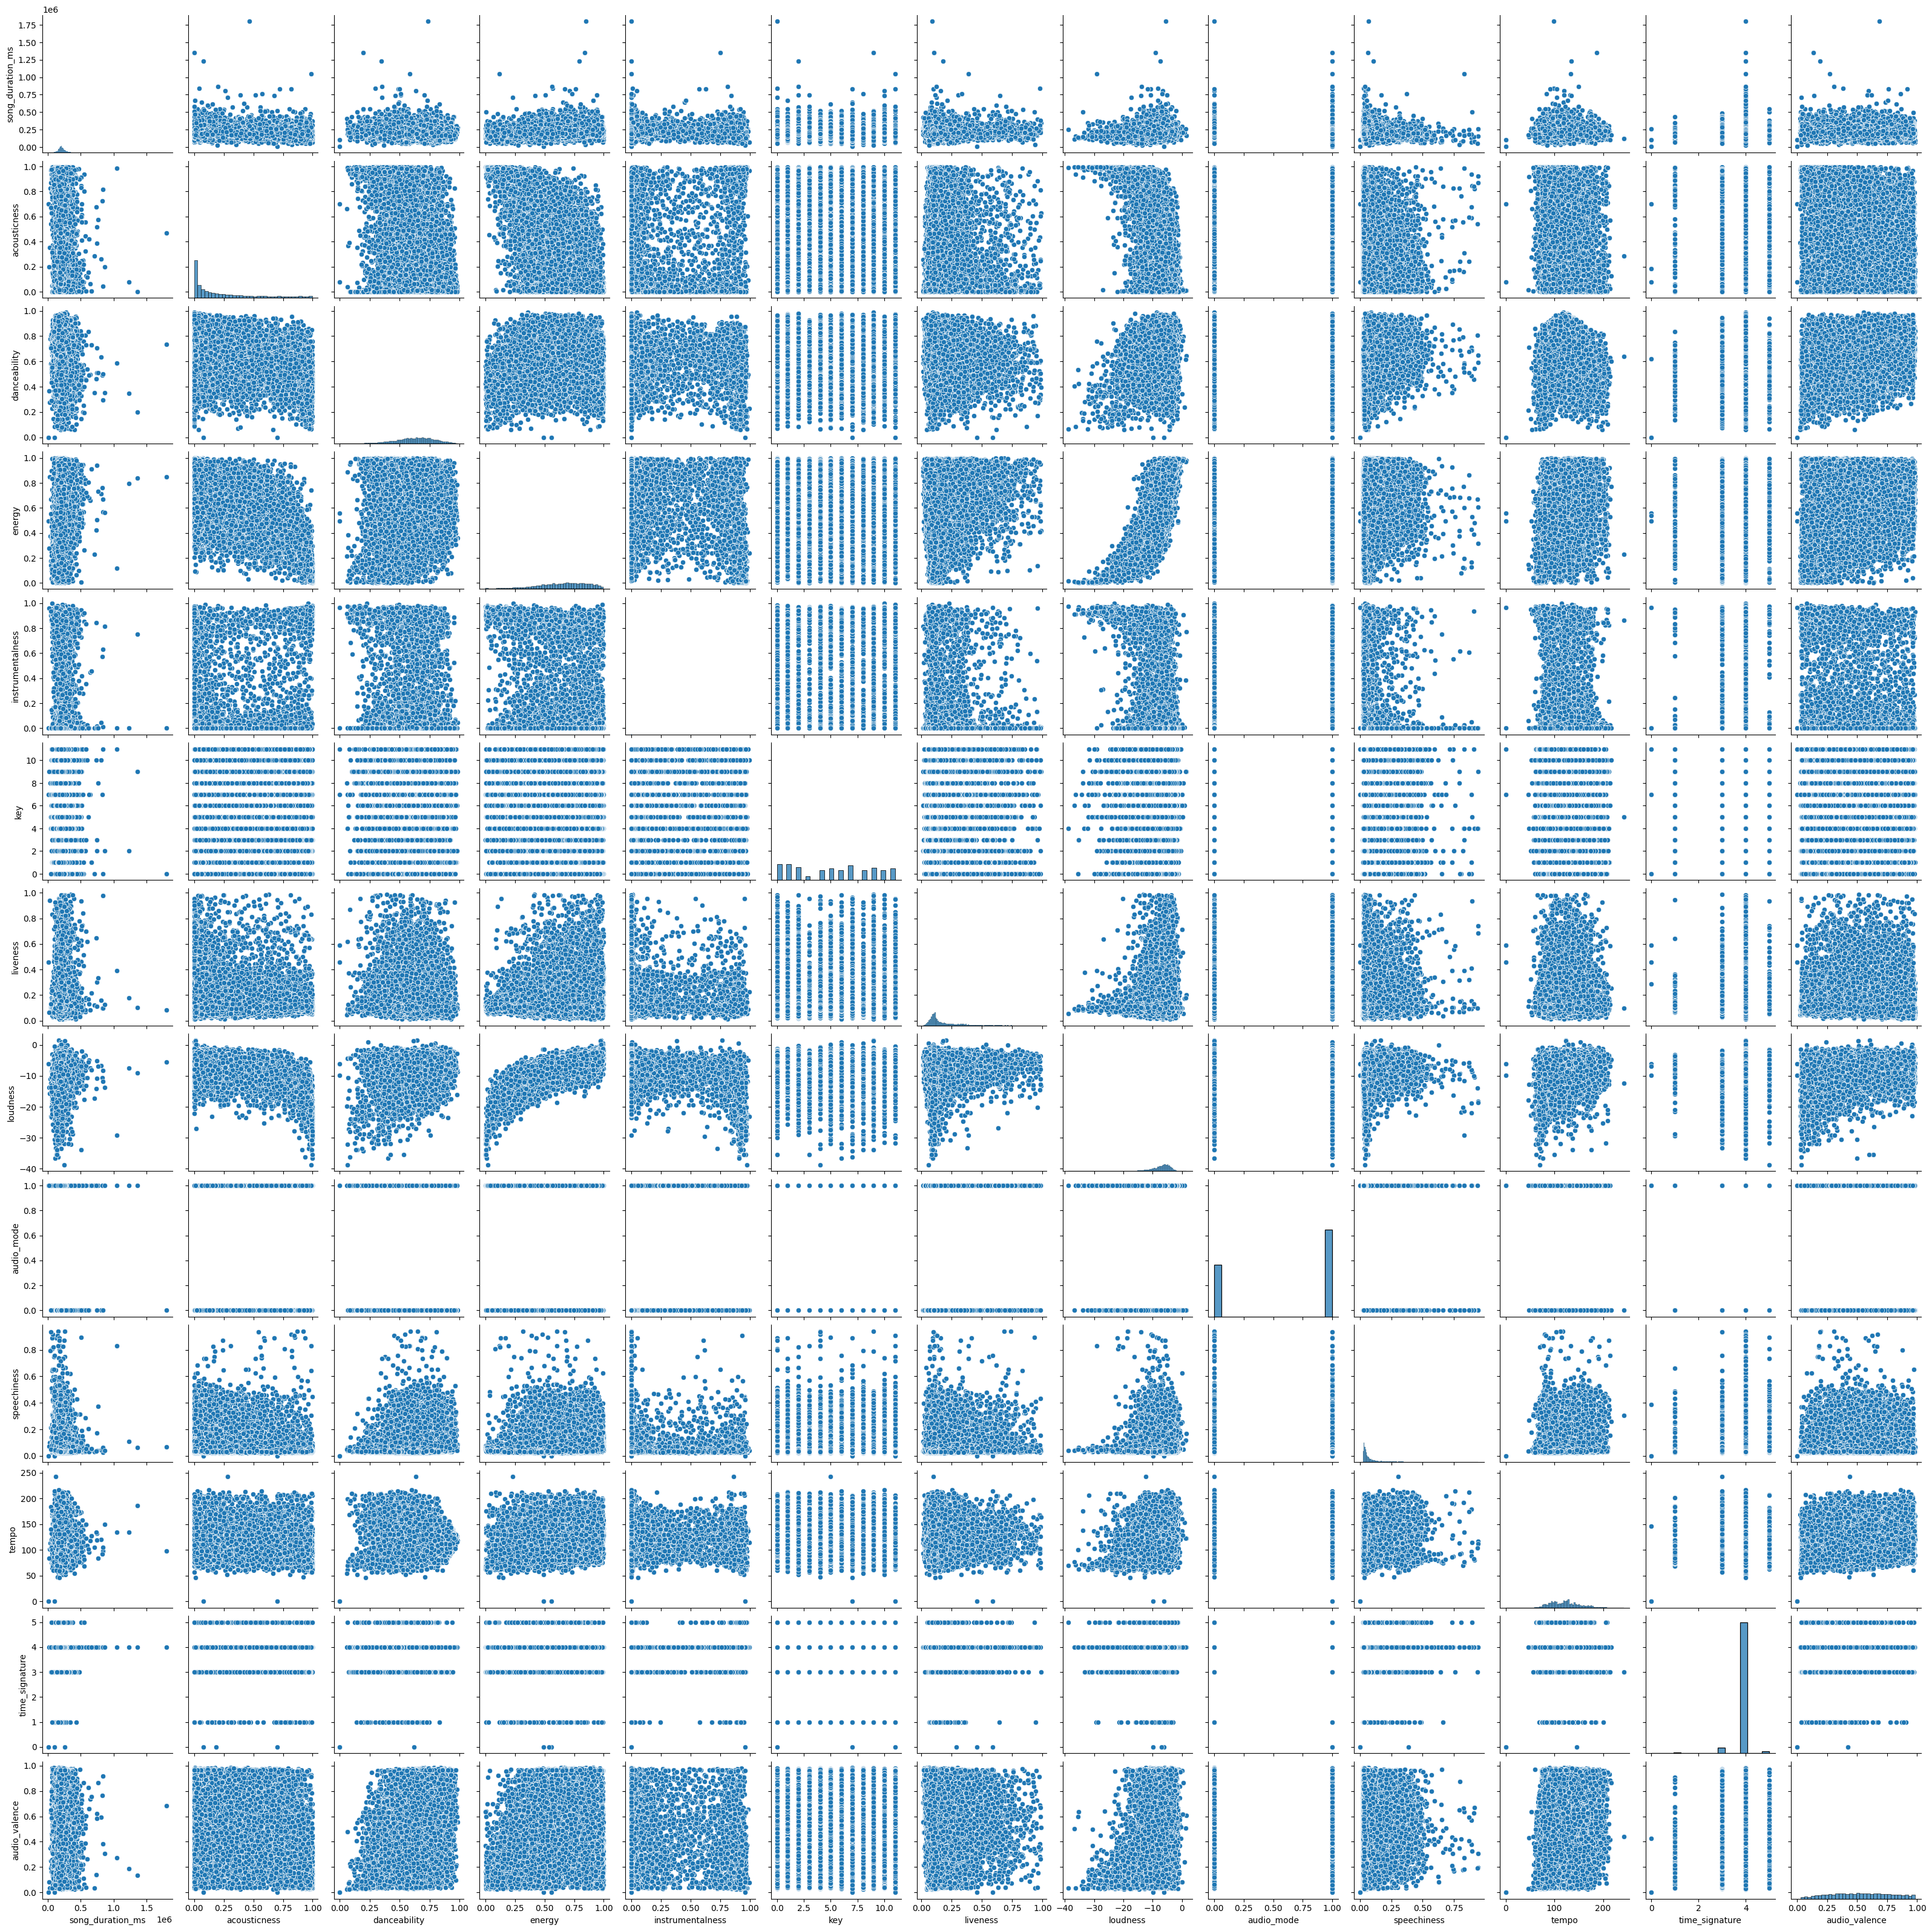

In [40]:
sns.pairplot(X)

### Feature Selection

##### Ask a question - How do you think out of so many variables/ features we will recognise which features are importance for us? How we will filter the columns?

#### There are few ways to select best features:
1. using correlation matrix
2. using VIF (variance inflation factor)
3. using selectKBest method
4. Feature importance technique

### Using correlation matrix

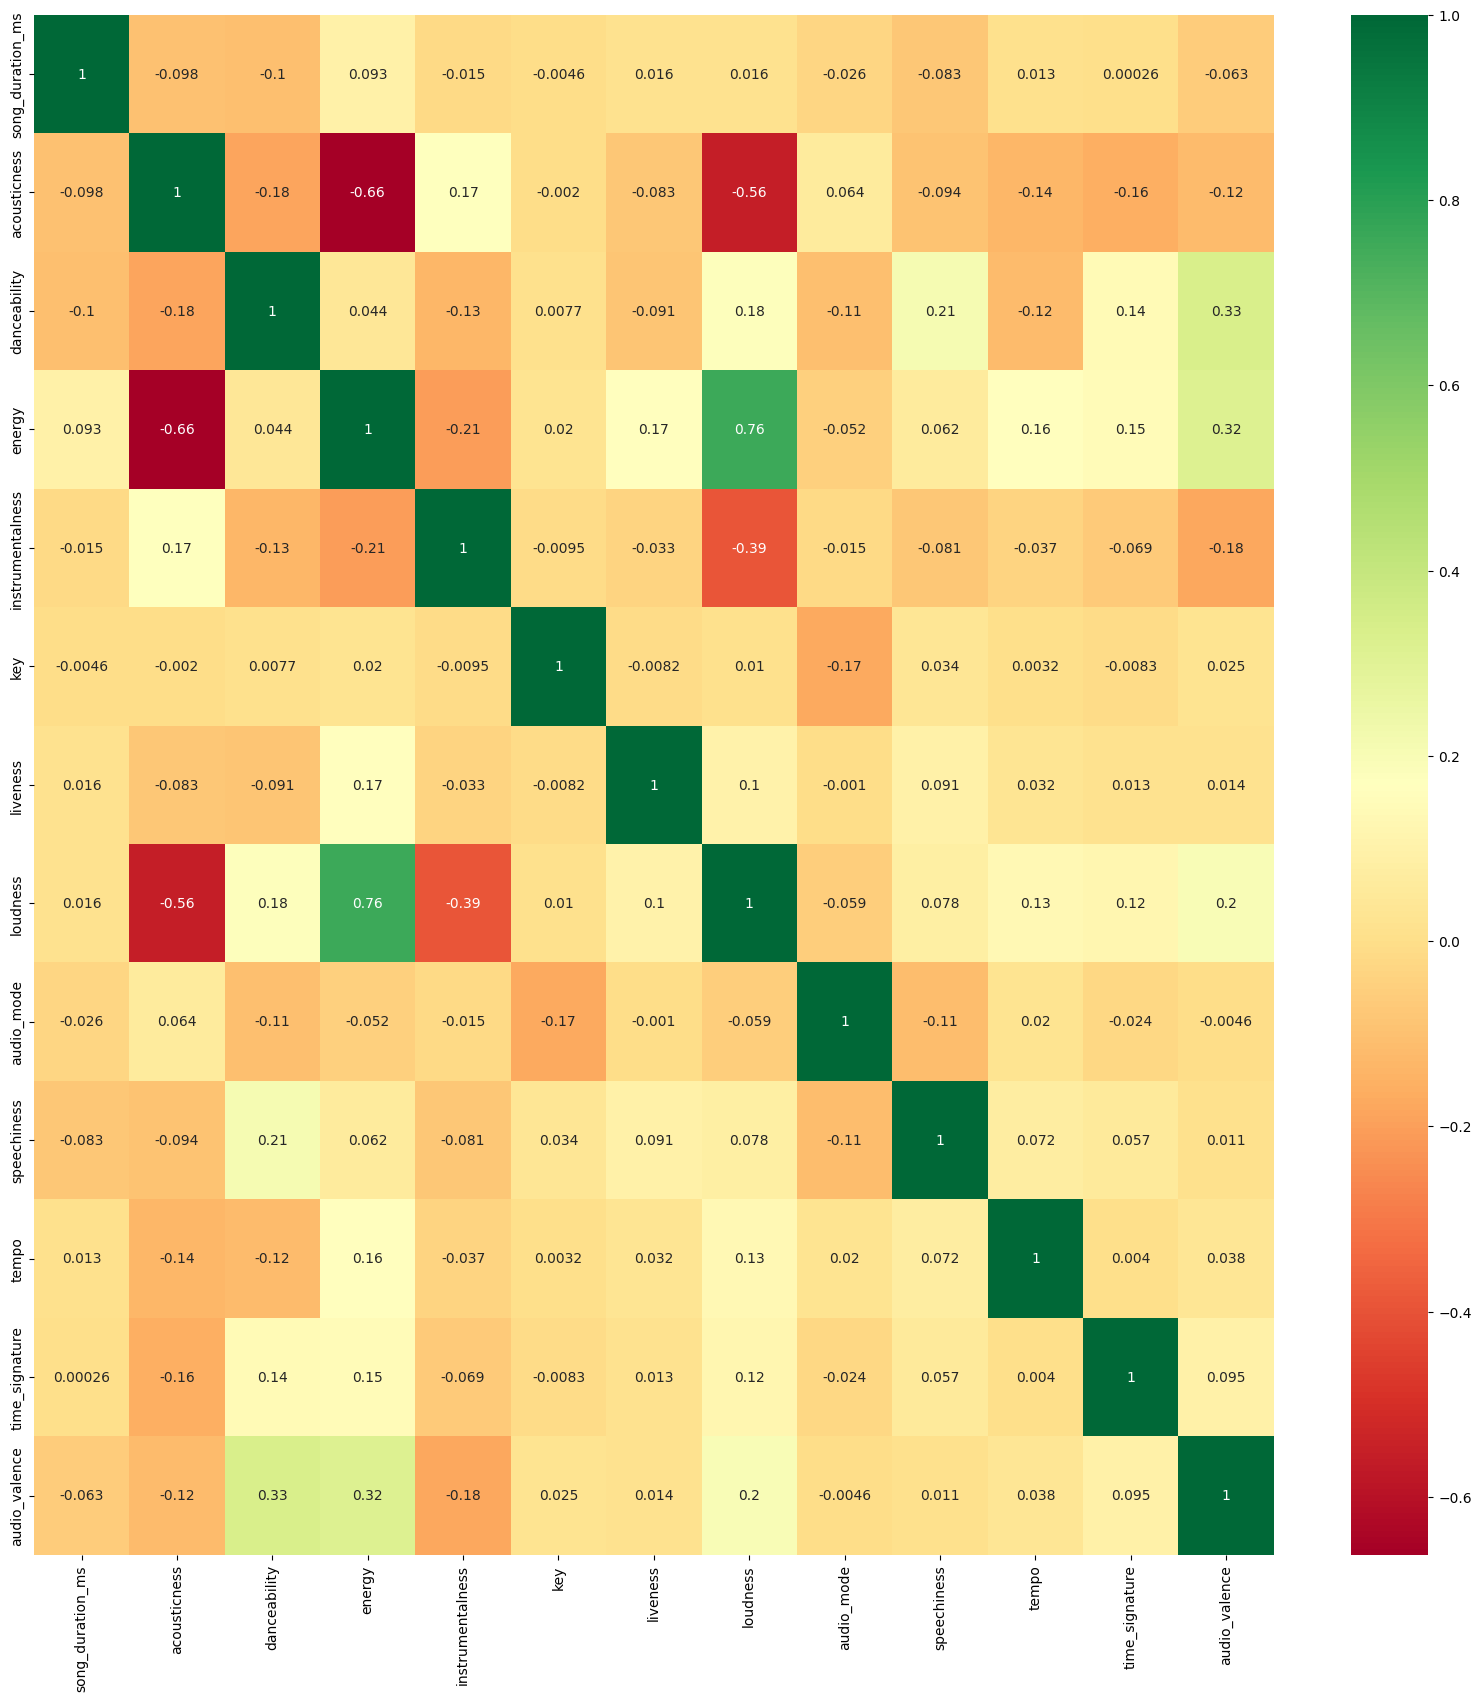

In [41]:
correlation_matrix = X.corr()
indices = correlation_matrix.index
plt.figure(figsize=(20,20))
hmap = sns.heatmap(X[indices].corr(), annot=True, cmap="RdYlGn") 

In [51]:
# List column names of highly correlated features (r > 0.95)
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]

df.drop(to_drop, axis=1, inplace=True)

/Users/roshnitayal/anaconda3/envs/songproject/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
to_drop

['energy', 'loudness']

### using VIF
The variance inflation factor (VIF) is another way to detect multicollinearity between features. The VIF measures how much the variance of the estimated regression coefficients is increased because of multicollinearity in the model. If the VIF of a feature is greater than 5 or 10, it indicates that the feature is highly correlated with other features in the model.

In [54]:
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 3.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 3.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 2.9 MB/s eta 0:00:00a 0:00:01


In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# calculate VIF for each feature

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif["features"] = X.columns

# print VIF values

print(vif)

    VIF Factor          features
0    14.265089  song_duration_ms
1     3.177762      acousticness
2    21.625450      danceability
3    30.732653            energy
4     1.400073  instrumentalness
5     3.208983               key
6     2.681362          liveness
7    11.940959          loudness
8     2.805870        audio_mode
9     2.154095       speechiness
10   18.285176             tempo
11   88.901818    time_signature
12    7.716693     audio_valence


### Using scikit-learn's SelectKBest method
Sk learn provides a SelectKBest method that can be used to select the k most important features based on a scoring function. This method can select the essential features and remove the highly correlated ones. 

In [58]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 3.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 3.6 MB/s eta 0:00:0000:0100:01


In [67]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_regression

# define number of features to keep
k = 6
# perform feature selection
X_new = SelectKBest(f_regression, k=k).fit_transform(X, Y)
# get feature names of selected features
selected_features = X.columns[SelectKBest(f_regression, k=k).fit(X, Y).get_support()]
# print selected features
print(selected_features)

Index(['acousticness', 'danceability', 'instrumentalness', 'liveness',
       'loudness', 'audio_valence'],
      dtype='object')


### get feature importance

In [64]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [65]:
print(model.feature_importances_)

[0.0803038  0.09123488 0.09238994 0.08956512 0.08837943 0.07562839
 0.08134619 0.09329739 0.03279849 0.07816787 0.08360421 0.01670766
 0.09657663]


In [66]:
X.columns

Index(['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence'],
      dtype='object')

In [68]:
X = X[['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness','liveness', 'loudness','tempo', 'audio_valence']]

## modeling

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

In [71]:
from sklearn.ensemble import RandomForestRegressor
rfmodel = RandomForestRegressor()

In [75]:
#useful for hyper parameter tuning. RSCv is faster than Grid searh CV
from sklearn.model_selection import RandomizedSearchCV

In [73]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [76]:
 # Create the random grid
hyperparameter_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(hyperparameter_grid)

{'n_estimators': [100, 181, 263, 345, 427, 509, 590, 672, 754, 836, 918, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [78]:
model = RandomizedSearchCV(estimator = rfmodel, param_distributions = hyperparameter_grid, scoring='neg_mean_squared_error', n_iter = 2, cv = 5, verbose=2, random_state=42)
model

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=2,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 181, 263, 345,
                                                         427, 509, 590, 672,
                                                         754, 836, 918, 1000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [79]:
model.fit(X_train,Y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=754; total time=  14.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=754; total time=  14.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=754; total time=  13.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=754; total time=  14.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=754; total time=  14.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=918; total time=  23.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=918; total time=  24.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=9

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=2,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 181, 263, 345,
                                                         427, 509, 590, 672,
                                                         754, 836, 918, 1000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [80]:
model.best_params_

{'n_estimators': 918,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

In [81]:
predictions=model.predict(X_test)

In [82]:
predictions

array([60.47940764, 47.73714027, 49.34863087, ..., 49.71948535,
       44.20082482, 52.26727014])

/Users/roshnitayal/anaconda3/envs/songproject/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='song_popularity', ylabel='Density'>

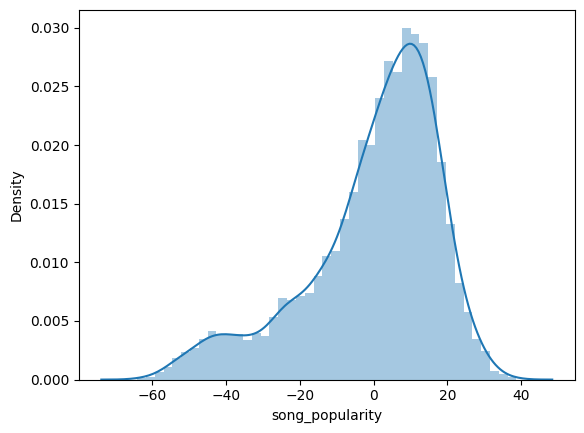

In [84]:
sns.distplot(Y_test-predictions)

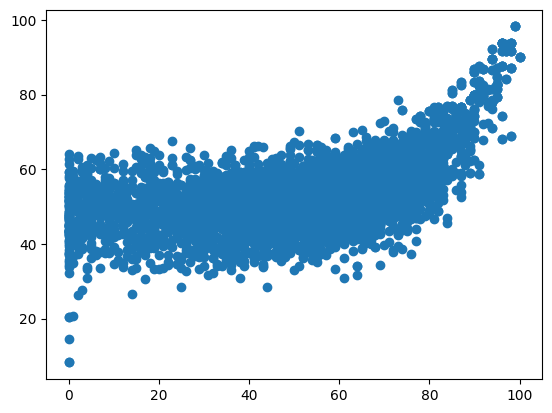

In [86]:
plt.scatter(Y_test,predictions)

In [88]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 14.102265394574015
MSE: 330.7317244273431
RMSE: 18.18603102458981
